In [1]:
import os
import pandas as pd
import numpy as np
import cv2

import gradio as gr
from PIL import Image, ImageDraw, ImageFont
import glob
import json


In [2]:
IN_PATH = "/home/jjjj/Pictures/9_09_res_tt"
OUT_PATH = "/home/jjjj/Pictures/9_09_text"

prov = "PG SOFT"

In [3]:
def split_text(text):
    THRESH = 8
    THRESH_2 = 7    
    
    new_text = []
    
    if text[0] == "THE":
        del text[0]
        text[0] = "THE " + text[0]
    
    
    if "VS" in text:
        text = " ".join(text)
        text = text.split(" VS ")
        return [[text[0]], ["VS"], [text[1]]]
    
    if len(text) <= 3:
        if len(" ".join(text)) < THRESH_2:
            new_text = [[" ".join(text)]]
        else:
            new_text = [text[:1], text[1:]]
    else:
        a = ""
        for i in text:
            if len(a) < THRESH:
                a += " " + i
            else:
                new_text.append([a.strip()])
                a = i
        new_text.append([a.strip()])
    return new_text

In [4]:
splits = {
    1: [[340, 78]],
    2: [[355, 56], [400, 68]],
    3: [[310, 68], [370, 44], [420, 68]]
}

UP_FONT_PATH = "/home/jjjj/Documents/gallery_view/fonts/RubikWetPaint-Regular.ttf"

FONT_PATH = "/home/jjjj/Documents/gallery_view/fonts/RedHatText-VariableFont_wght.ttf"

TOP = 490


In [5]:
tops = [310, 350, 350, 340]

In [ ]:
for img_path in os.listdir(IN_PATH):
    if img_path.endswith(".json"):
        continue
    # img_path = "WIN WIN FISH PRAWN CRAB PG SOFT.png"
    
    text = ".".join(img_path.split(".")[:-1]).replace(prov, "").strip()

    text = split_text(text.split(" "))
    
    img = Image.open(os.path.join(IN_PATH, img_path))
    img = img.convert("RGB")
    
    img = img.resize((544, 544))
    img = np.array(img)
    img = img[:, 68:-68]
    img = Image.fromarray(img)
    
    s = splits[len(text)]
    
    top = tops[len(text)]
    
    for t in text:
        t = " ".join(t)
        image = Image.new('RGB', img.size, "white")
        draw = ImageDraw.Draw(image)
        
        w = 1000
        print(t)
        for f_size in [38, 42, 46, 48, 52, 56, 64, 72, 80, 98, 106, 112]:
            
            font = ImageFont.truetype(UP_FONT_PATH, f_size)
            
            _, _, w, h = draw.textbbox(
                (0, 0), t, font=font
            )
            print(w, h)
            if w > 360 or h > (150 / len(text)):
                draw = ImageDraw.Draw(img)
                draw.text(((img.size[0] - w) / 2, top), t, font=font, fill="white")
                top += h - 10
                break

    
    image = Image.new('RGB', img.size, "white")
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype(FONT_PATH, 34)

    _, _, w, h = draw.textbbox(
        (0, 0), prov, font=font
    )

    draw = ImageDraw.Draw(img)
    draw.text(((img.size[0] - w) / 2, TOP), prov, font=font, fill="white")

    img.save(os.path.join(OUT_PATH, img_path))


EMOJI
127 45
140 50
153 55
160 57
173 62
187 67
213 76
RICHES
150 45
166 50
182 55
190 57
206 62
222 67
253 76
SHAOLIN
178 46
197 51
215 56
225 57
244 62
262 67
300 76
SOCCER
163 45
180 50
198 55
206 56
223 61
240 66
275 75
309 84
TOTEM
137 45
151 50
166 55
173 56
187 61
202 66
230 75
259 85
WONDERS
196 48
217 53
237 58
248 60
268 65
289 71
330 80
SONGKRAN
223 50
246 55
270 60
281 62
305 67
328 73
375 83
SPLASH
161 46
178 51
195 56
204 57
221 62
238 67
271 76
LEGENDARY
240 48
266 53
291 58
304 60
329 65
355 71
405 80
MONKEY KING
272 50
301 55
330 60
344 62
373 67
JUNGLE
161 45
178 50
195 55
203 56
220 61
237 66
271 75
305 84
DELIGHT
175 48
193 53
212 58
221 60
239 65
258 71
294 80
BALI
94 46
104 51
114 56
119 57
129 62
138 67
158 76
VACATION
203 46
224 51
245 56
256 57
277 62
299 67
341 76
CAPTAIN'S
213 46
236 51
258 56
269 57
292 62
314 67
359 76
BOUNTY
165 44
183 49
200 54
209 55
226 60
244 65
279 74
313 83
THE GREAT
221 46
244 51
267 56
278 57
302 62
325 67
371 76
ICESCAPE
202 46
22

In [107]:
130 / len(text)

43.333333333333336

In [84]:
text

[['EMOJI'], ['RICHES']]

In [73]:
for img_path in os.listdir(IN_PATH):
    if img_path.endswith(".json"):
        continue
    
    text = ".".join(img_path.split(".")[:-1]).replace(prov, "").strip()

    text = split_text(text.split(" "))
    
    img = Image.open(os.path.join(IN_PATH, img_path))
    img = img.convert("RGB")
    
    img = img.resize((544, 544))
    img = np.array(img)
    img = img[:, 68:-68]
    img = Image.fromarray(img)
    
    s = splits[len(text)]
    
    for t, (top, f_size) in zip(text, s):
        t = " ".join(t)
        image = Image.new('RGB', img.size, "white")
        draw = ImageDraw.Draw(image)
        
        font = ImageFont.truetype(UP_FONT_PATH, f_size)
        
        _, _, w, h = draw.textbbox(
            (0, 0), t, font=font
        )
    
        draw = ImageDraw.Draw(img)
        draw.text(((img.size[0] - w) / 2, top), t, font=font, fill="white")
    
    image = Image.new('RGB', img.size, "white")
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype(FONT_PATH, 34)

    _, _, w, h = draw.textbbox(
        (0, 0), prov, font=font
    )

    draw = ImageDraw.Draw(img)
    draw.text(((img.size[0] - w) / 2, TOP), prov, font=font, fill="white")

        
    img.save(os.path.join(OUT_PATH, img_path))


In [53]:
img = img.resize((544, 544))

In [ ]:
408

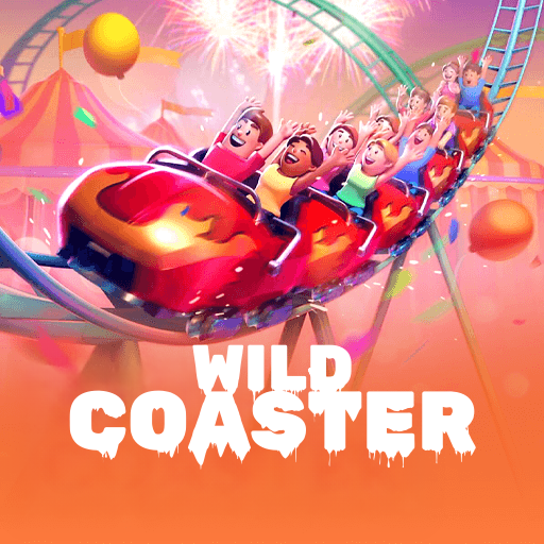

In [54]:
img

In [55]:
img = np.array(img)
img.shape

(544, 544, 3)

In [59]:
img[68:-68].shape

(408, 544, 3)

In [57]:
(544 - 408) / 2

68.0

In [39]:
len("FORTUNE OX")

10

In [10]:
text.split()

['EMOJI', 'RICHES']

In [13]:
text = "DESTINY OF SUN AND MOON"
text = text.split(" ")
text

['DESTINY', 'OF', 'SUN', 'AND', 'MOON']

SyntaxError: invalid syntax (3841739196.py, line 16)

In [14]:
len(text)

5